In [1]:
import pandas as pd
import numpy as np

import matplotlib
#matplotlib.use('Agg')

import matplotlib.cm as cm

import matplotlib.pyplot as plt
%matplotlib inline


phase_list=["A1","A2","A31","A32","A41","A42","A5","A6","A7"]

mouse=6

dfmax_all=pd.DataFrame()

In [2]:
#for ph in range(0,len(phase_list)):

for ph in range(0,9):
   

    phase=phase_list[ph]

    #for index in range(0,len(Index)):

    inputXY='ID138464-%s_%s_XY.txt' %(mouse,phase)

    dfx = pd.read_table(inputXY,header=0)

    inputT='ID138464-%s_long_trace_%s.csv'%(mouse,phase)

    dfl=pd.read_csv(inputT,header=0)


    dfx_m=pd.DataFrame(columns=dfx.columns,index=np.arange(0,int(dfx.iloc[dfx.shape[0]-1].loc['Slice']-1)*10))

    for i in range(2,int(dfx.shape[0])):

        for j in range(0,10):

            for k in range(0,len(dfx_m.columns)):

                dfx_m.iloc[(i-2)*10+j].loc[dfx_m.columns[k]]=dfx.iloc[i].loc[dfx_m.columns[k]]

    df=pd.concat([dfx_m, dfl], axis=1)
    df=df.dropna(how='any')

    Index=np.arange(int(df.iloc[0].loc['Slice']),int(df.iloc[df.shape[0]-1].loc['Slice']+1),1)

    df_max=pd.DataFrame(index=Index,columns=[])

    for i in range(0,len(df.columns)):

        df_max[df.columns[i]]=-100

    for i_n in range(int(df.iloc[0].loc['Slice']),int(df.iloc[df.shape[0]-1].loc['Slice']+1)):

        i = i_n - int(df.iloc[0].loc['Slice'])

        df_max.iloc[i].loc['Slice']=i_n

        dfs = df[df['Slice']==i_n]

        for k in range(0,df.columns.get_loc('Time2')+1):

            df_max.iloc[i,k]=dfs.iloc[0,k]


        for j in range(dfs.columns.get_loc(' C000'),dfs.columns.get_loc(' C261')+1):

            df_max.iloc[i,j]=dfs[dfs.columns[j]].max()
            
    
    df_max['phase']=ph
    
    dfmax_all=pd.concat([dfmax_all,df_max])

/Users/kanri/anaconda/envs/jupyter-env/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/kanri/anaconda/envs/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
dfmax_all

,Slice,X,Y,AREA,XOR,FZ,conseqFZ,Distance,Tone,Shock,...,C252,C253,C254,C255,C256,C257,C258,C260,C261,phase
2,2.0,91.0,171.0,1741.0,673.0,0.0,0.0,2.0,1.0,0.0,...,0.000603,-0.012301,-0.014040,0.006651,0.000355,0.052698,0.080112,0.030199,-0.019575,0
3,3.0,89.0,169.0,1761.0,244.0,0.0,0.0,0.5,1.0,0.0,...,-0.000905,-0.012941,-0.011964,0.007242,0.007540,0.058382,0.069258,0.040594,-0.004784,0
4,4.0,93.0,168.0,1420.0,754.0,0.0,0.0,0.5,1.0,0.0,...,0.000236,-0.005838,0.002546,0.004250,0.006153,0.067217,0.060110,0.030826,0.003628,0
5,5.0,82.0,137.0,1624.0,1562.0,0.0,0.0,4.0,1.0,0.0,...,-0.004296,-0.001780,0.004865,0.002037,-0.000808,0.065340,0.051112,0.017933,0.005200,0
6,6.0,77.0,93.0,1738.0,1822.0,0.0,0.0,5.3,1.0,0.0,...,0.014047,-0.006003,0.007615,-0.003667,-0.011310,0.050597,0.042136,0.012360,-0.000844,0
7,7.0,65.0,72.0,1866.0,1293.0,0.0,0.0,3.0,1.0,0.0,...,0.016845,-0.017371,0.011958,-0.003965,-0.019724,0.044338,0.039059,0.009815,-0.012908,0
8,8.0,57.0,57.0,1916.0,758.0,0.0,0.0,2.0,1.0,0.0,...,0.010854,-0.018002,0.007467,-0.007999,-0.019392,0.036929,0.033385,0.005306,-0.008224,0
9,9.0,51.0,61.0,1917.0,703.0,0.0,0.0,0.9,1.0,0.0,...,0.003737,-0.015016,-0.006289,-0.005431,-0.013255,0.035960,0.027298,0.006402,-0.004639,0
10,10.0,51.0,58.0,1973.0,428.0,0.0,0.0,0.4,1.0,0.0,...,-0.001748,-0.014411,-0.006993,-0.005787,-0.017045,0.027042,0.024773,0.006212,-0.005084,0
11,11.0,70.0,63.0,1021.0,1131.0,0.0,0.0,2.2,1.0,0.0,...,0.001956,-0.014984,-0.004334,-0.003063,-0.012583,0.013913,0.022130,0.007874,-0.000783,0


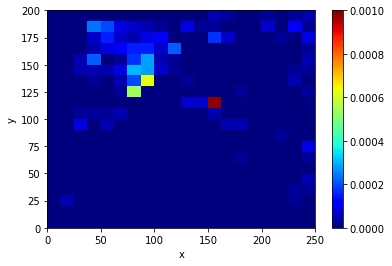

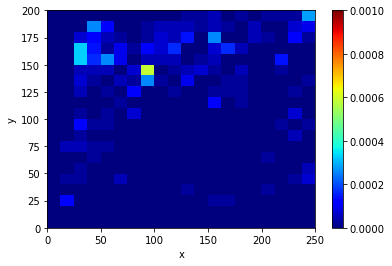

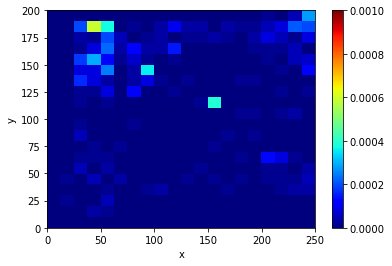

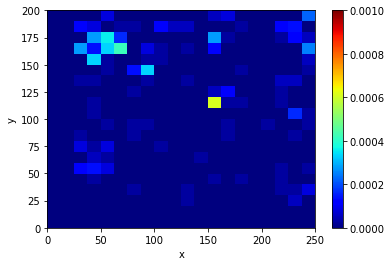

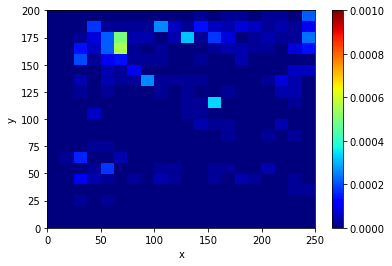

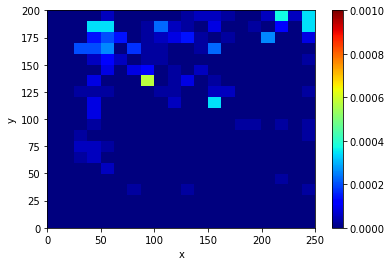

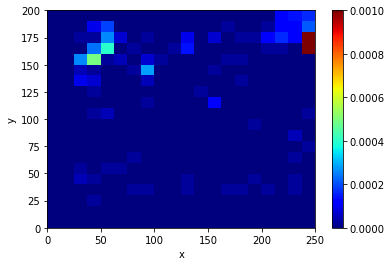

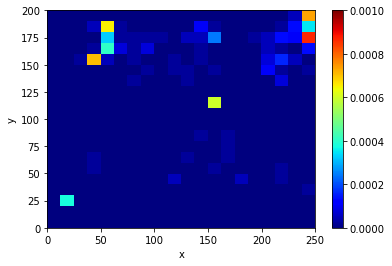

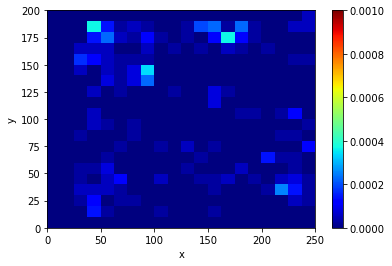

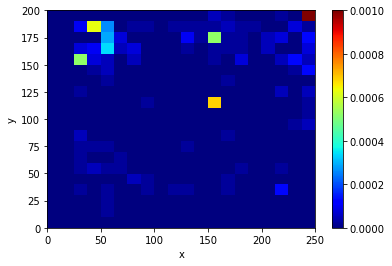

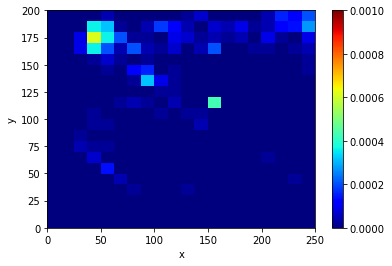

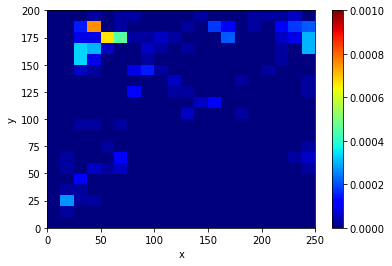

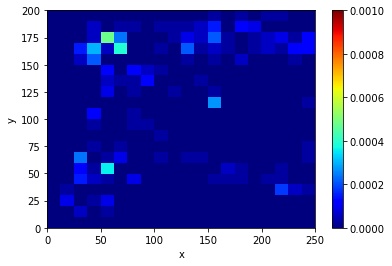

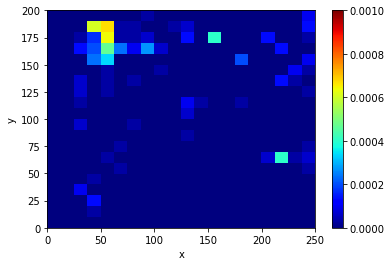

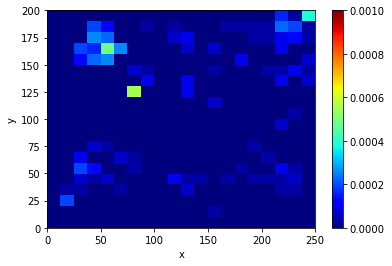

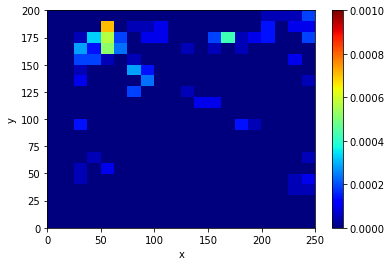

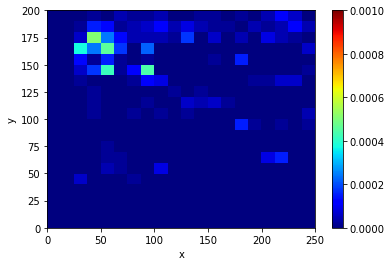

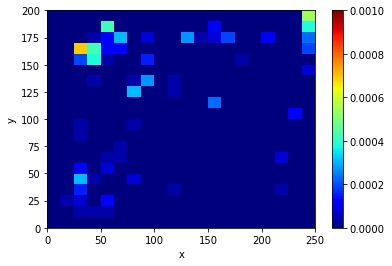

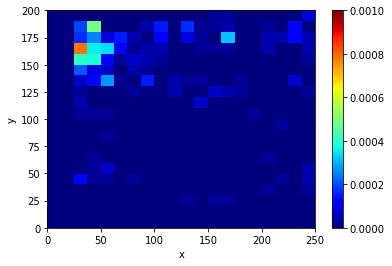

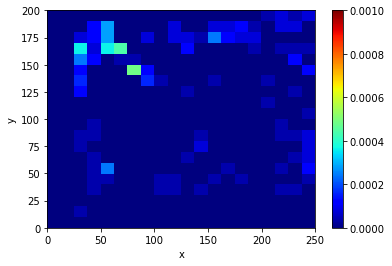

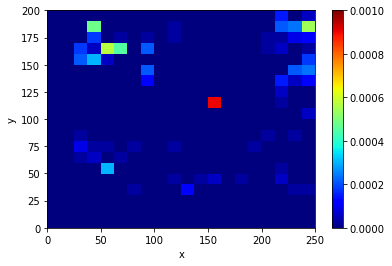

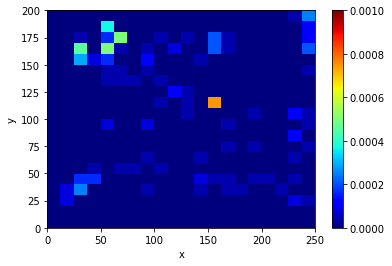

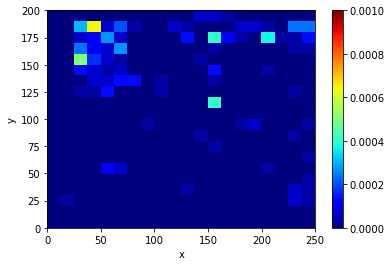

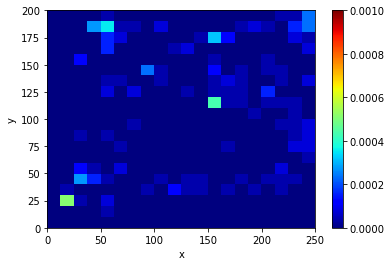

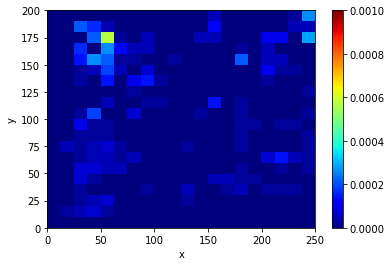

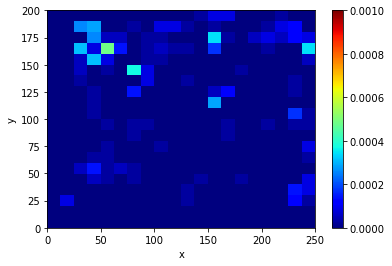

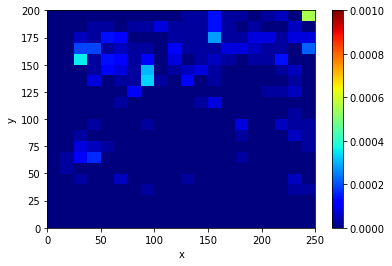

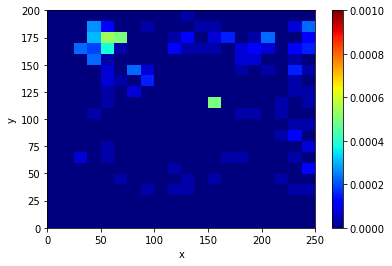

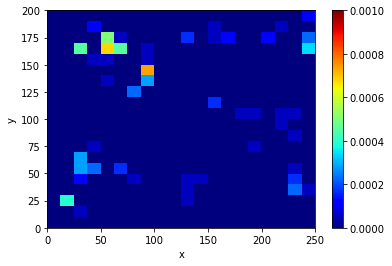

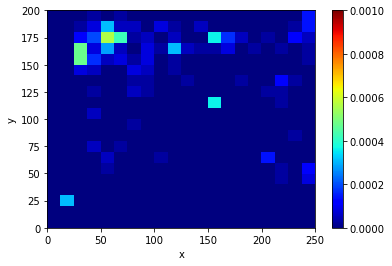

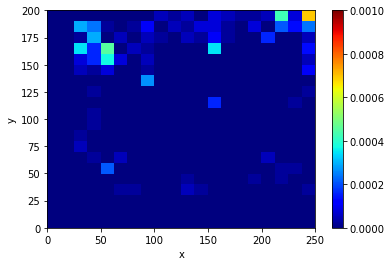

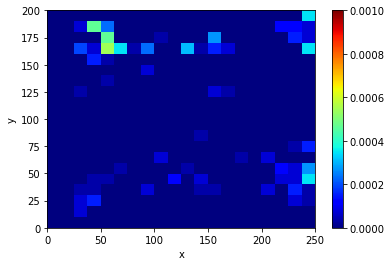

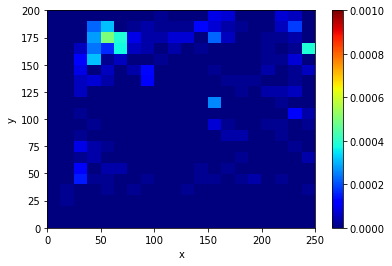

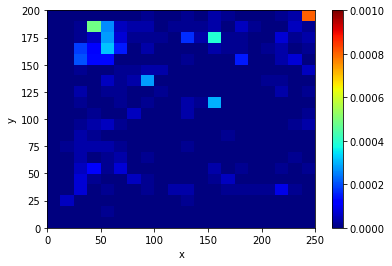

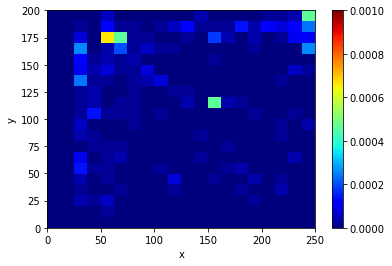

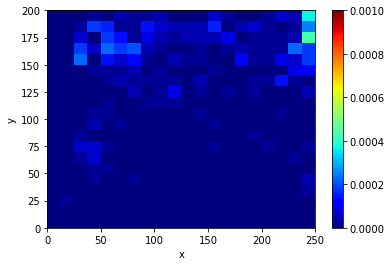

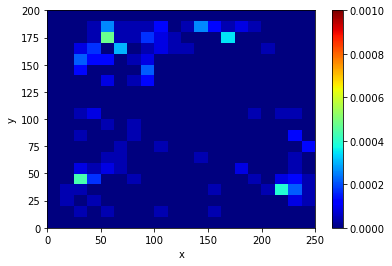

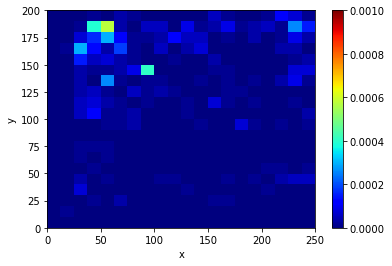

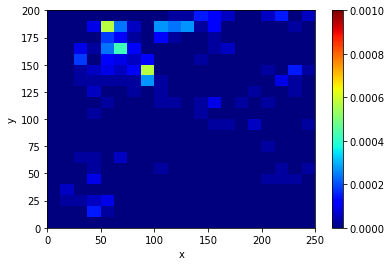

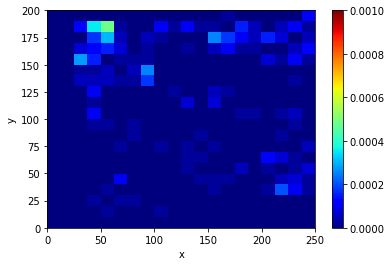

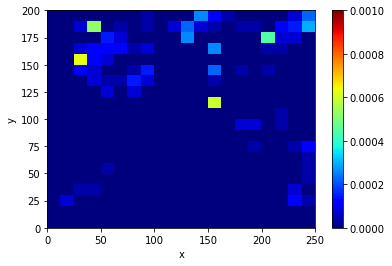

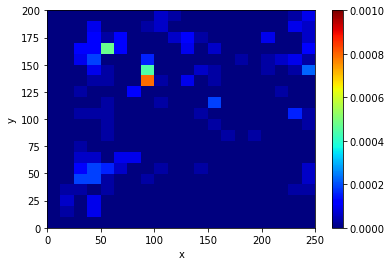

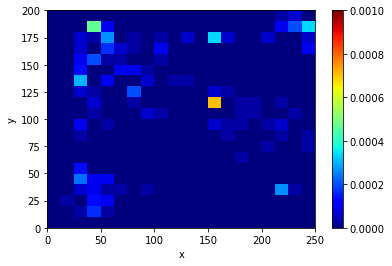

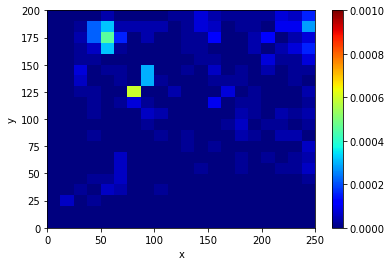

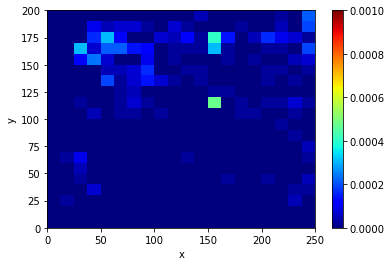

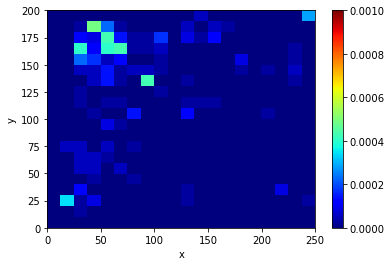

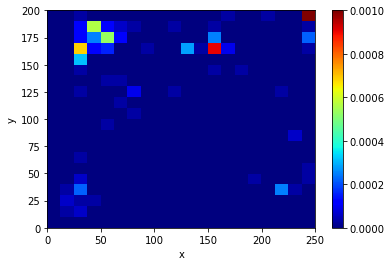

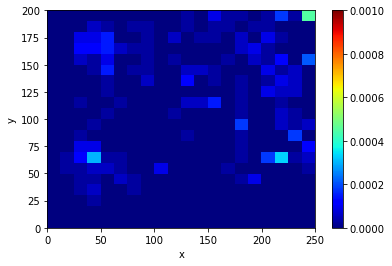

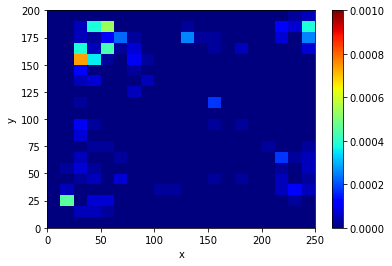

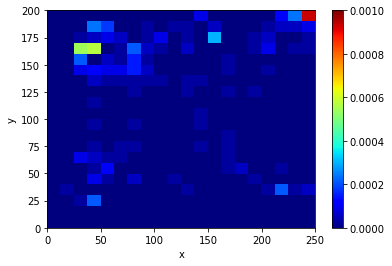

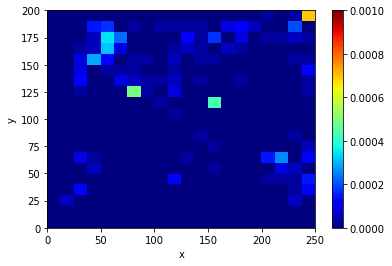

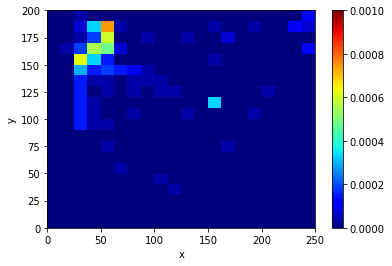

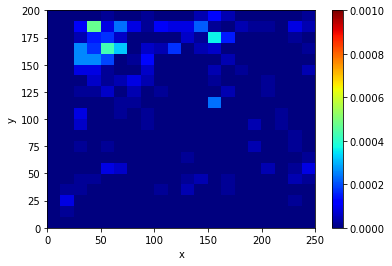

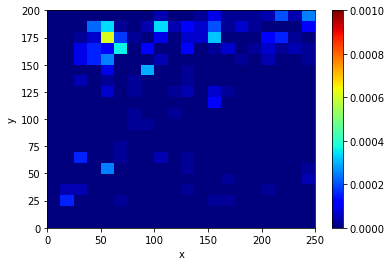

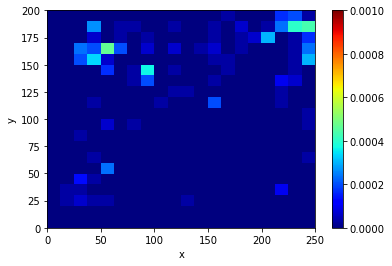

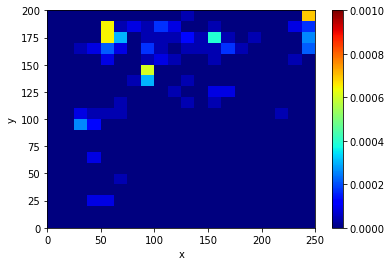

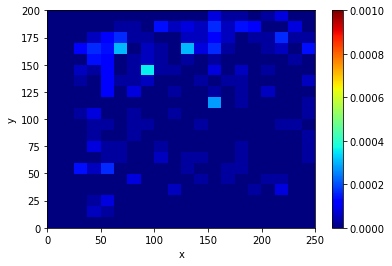

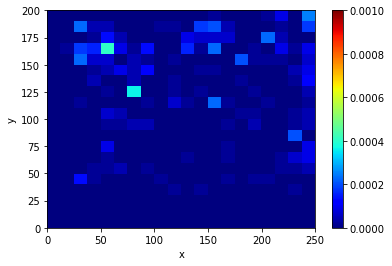

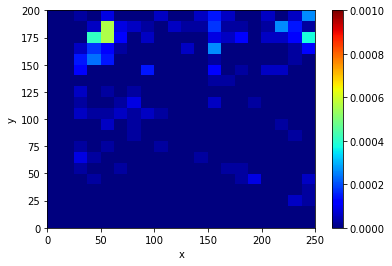

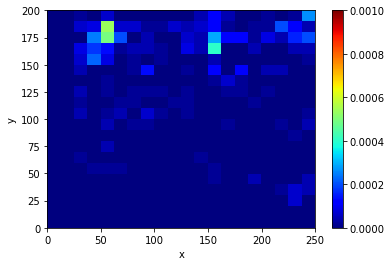

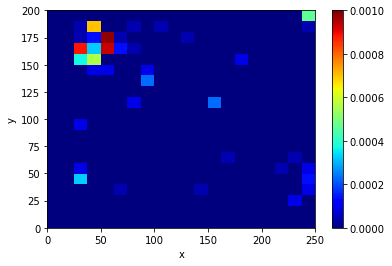

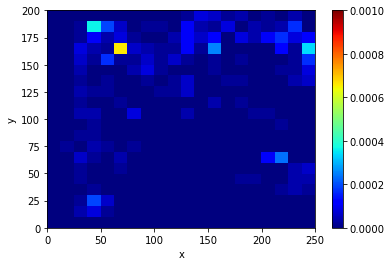

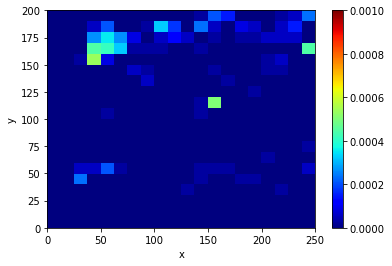

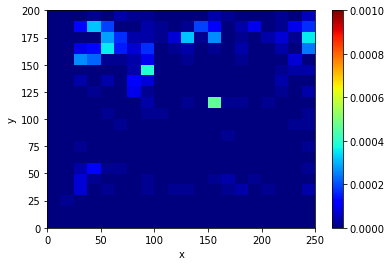

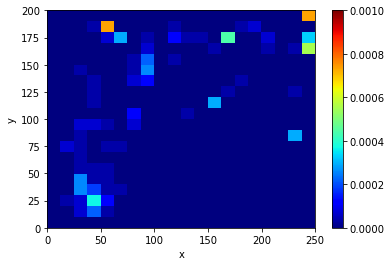

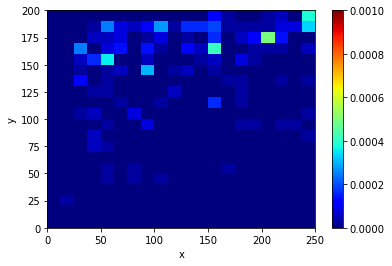

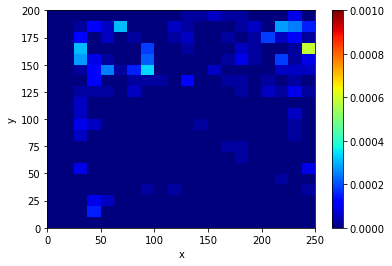

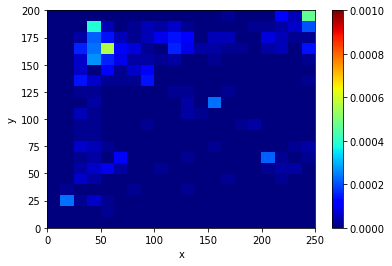

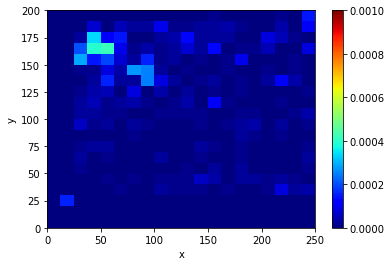

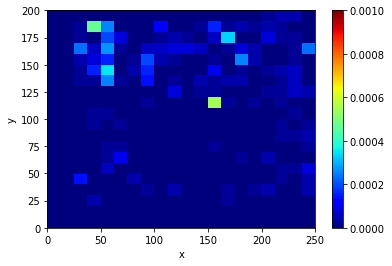

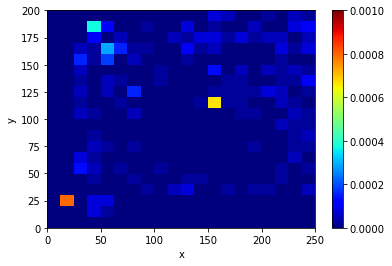

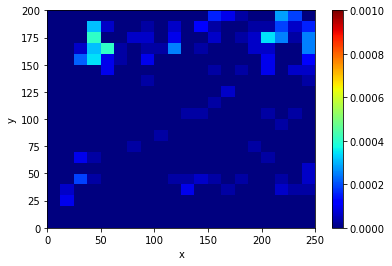

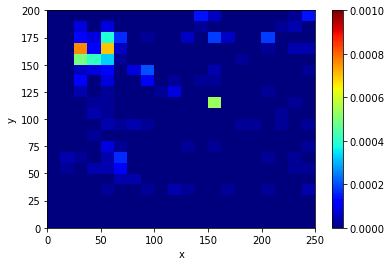

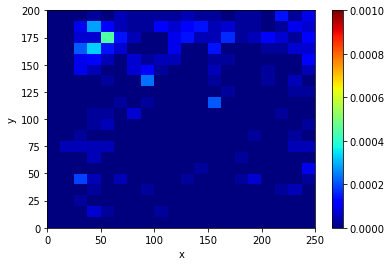

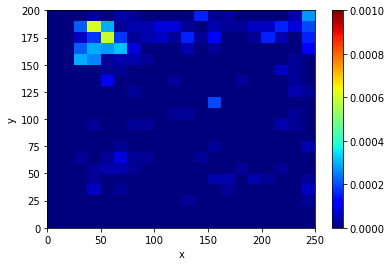

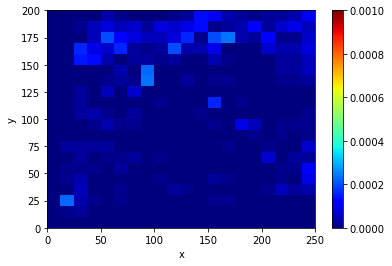

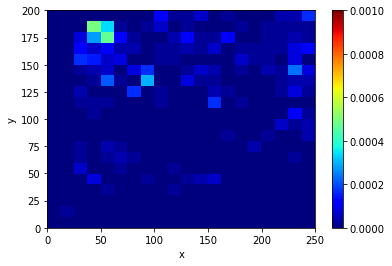

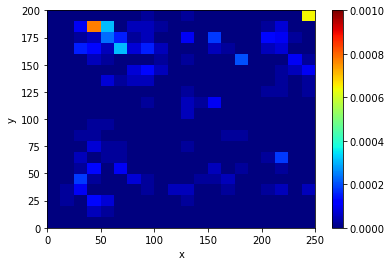

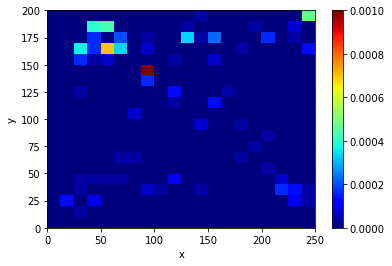

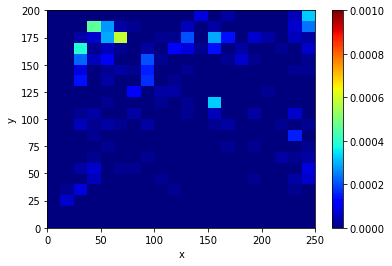

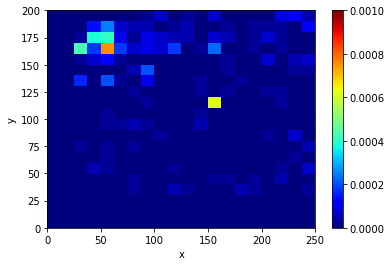

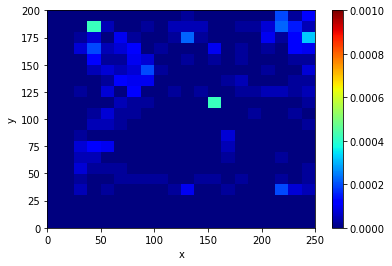

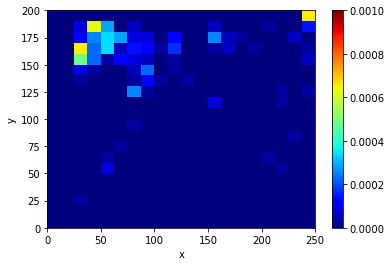

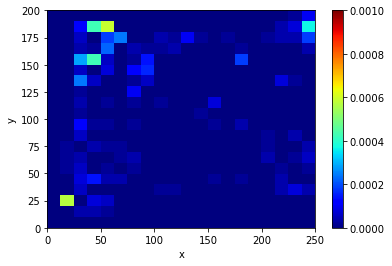

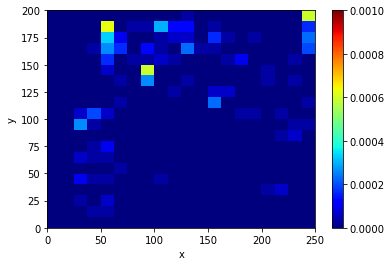

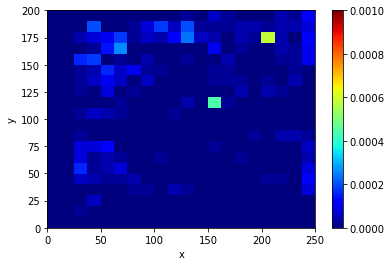

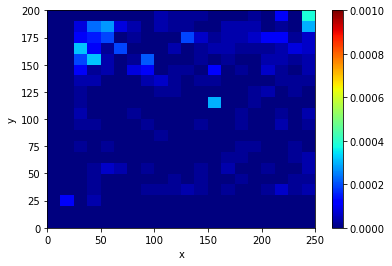

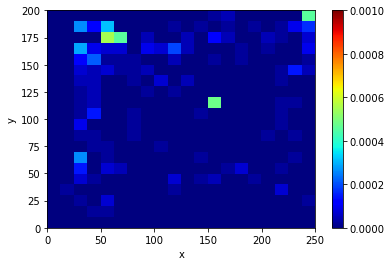

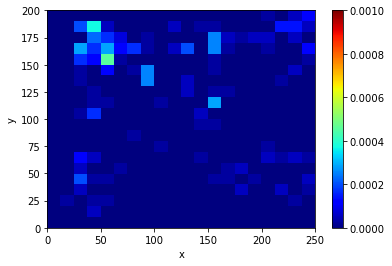

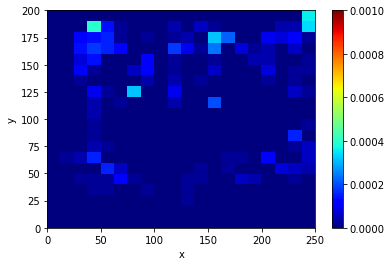

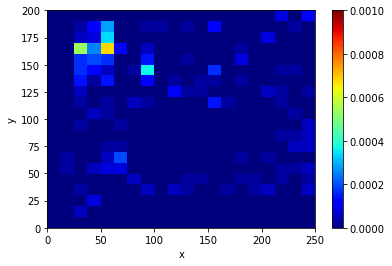

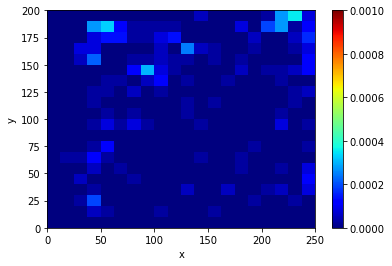

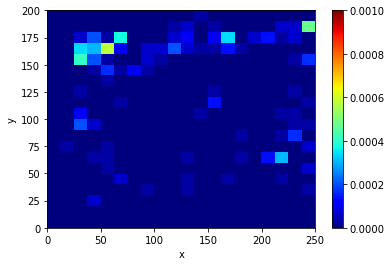

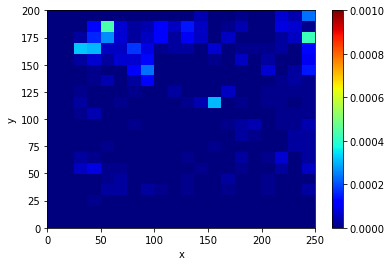

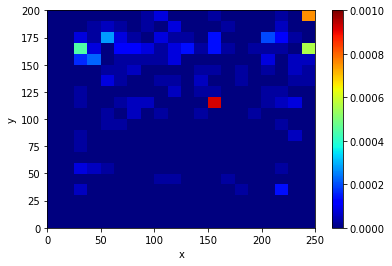

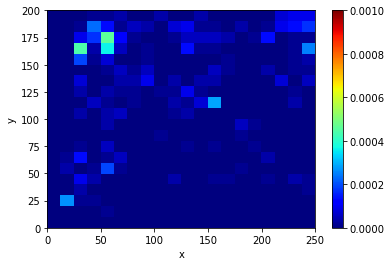

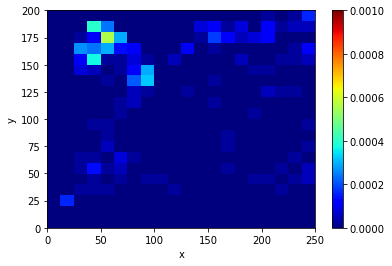

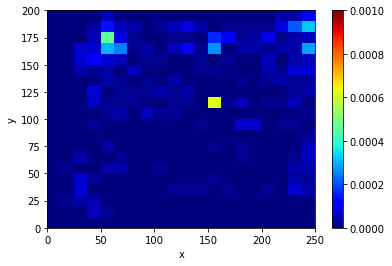

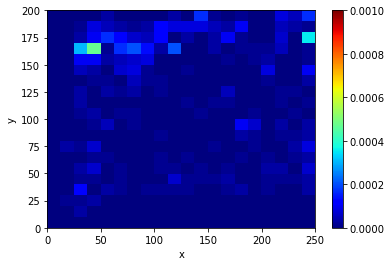

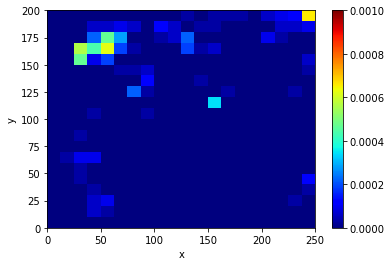

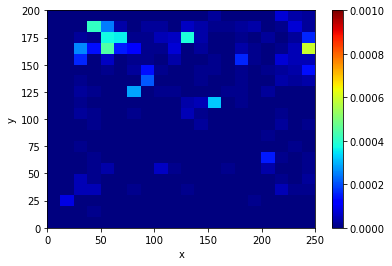

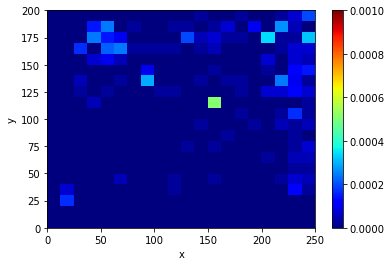

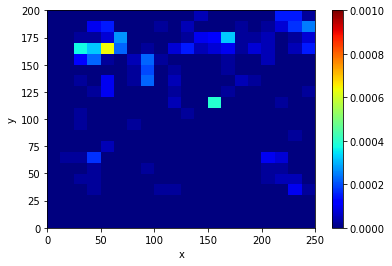

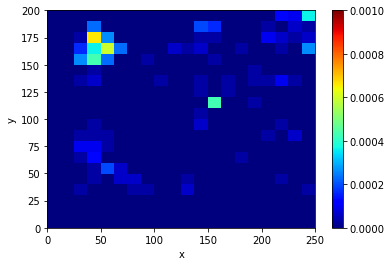

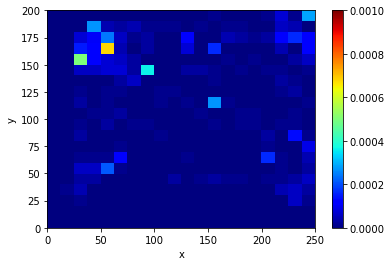

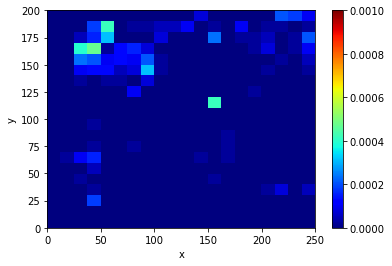

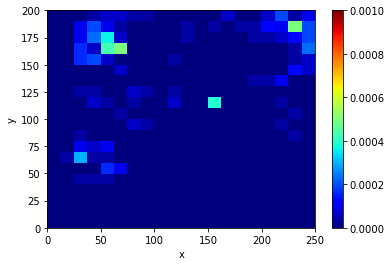

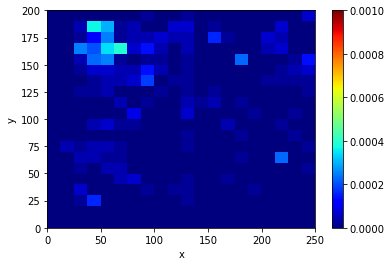

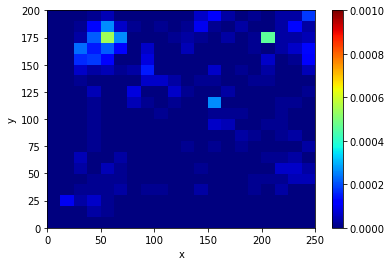

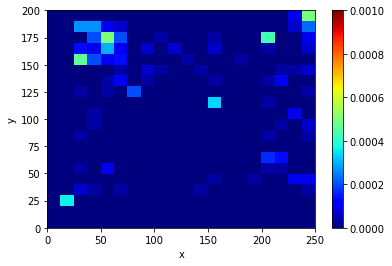

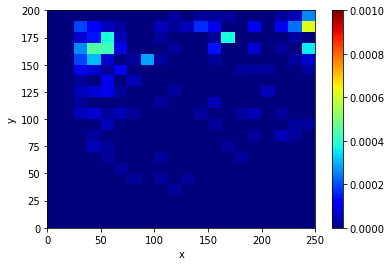

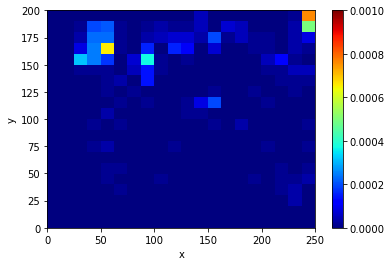

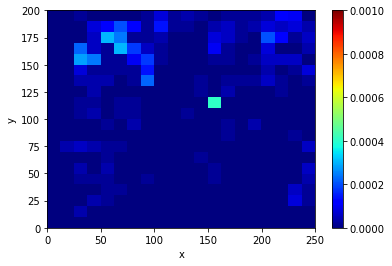

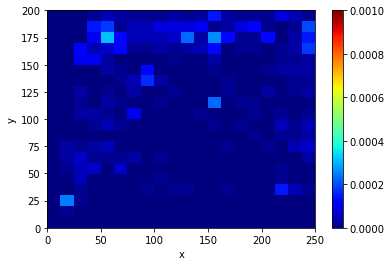

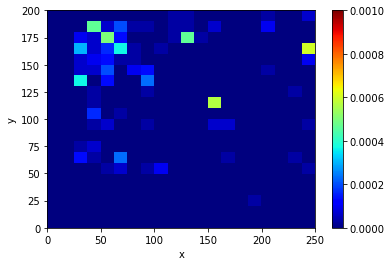

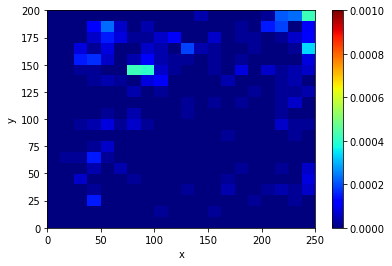

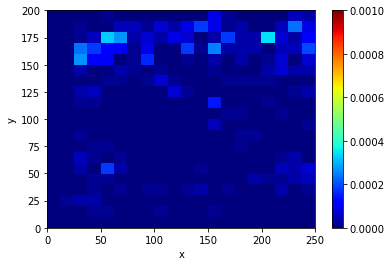

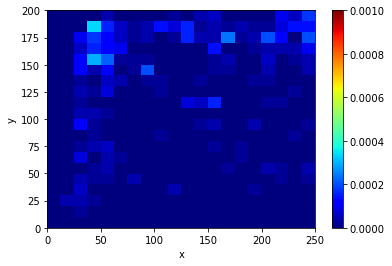

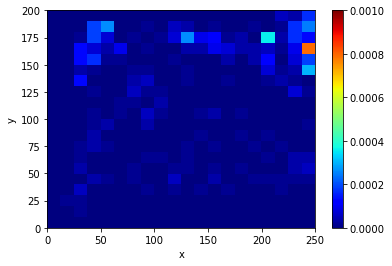

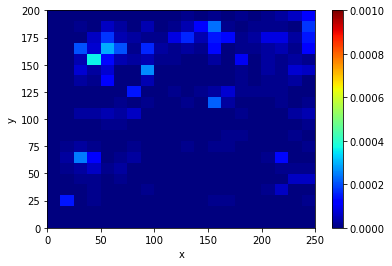

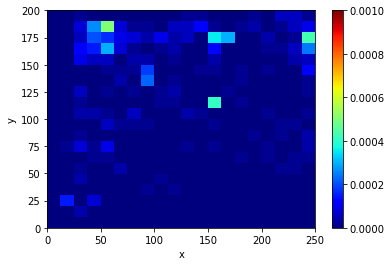

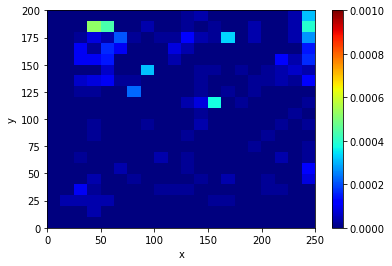

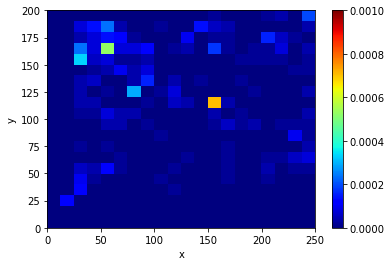

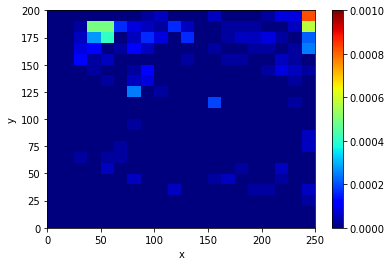

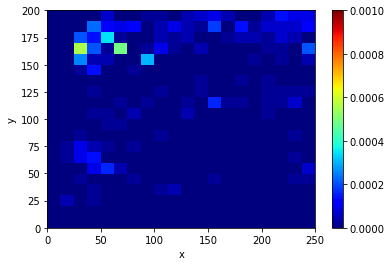

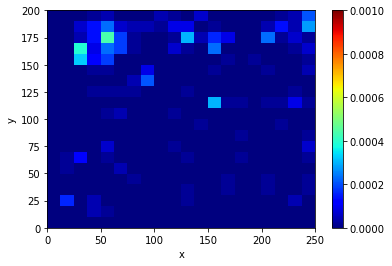

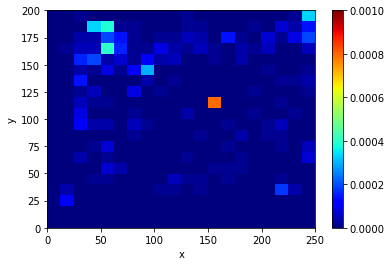

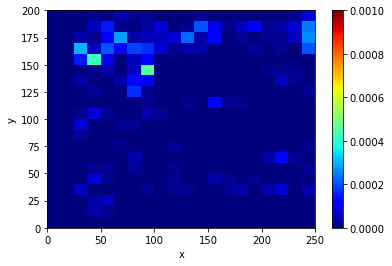

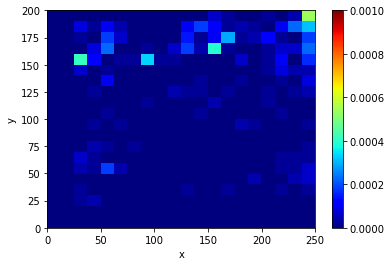

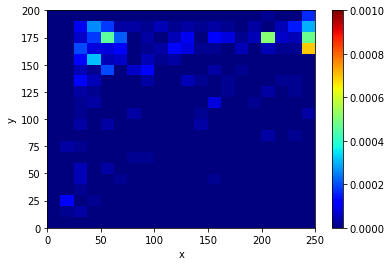

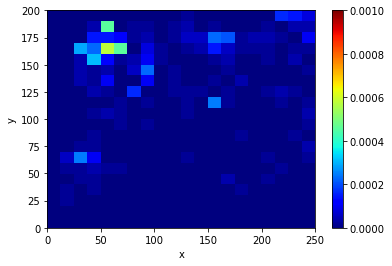

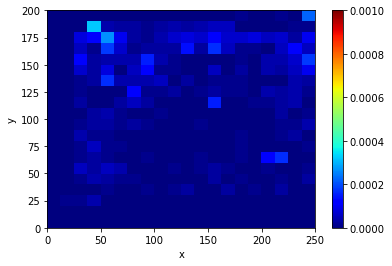

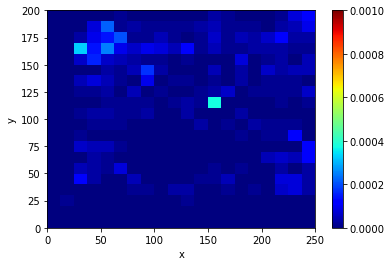

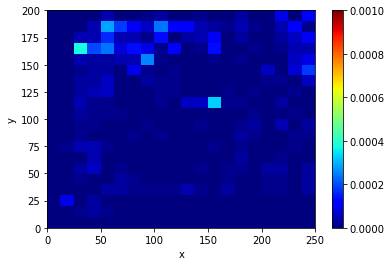

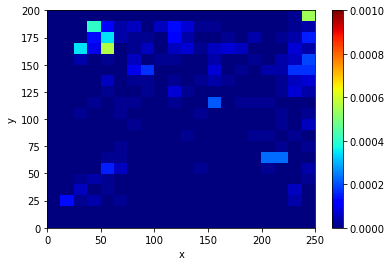

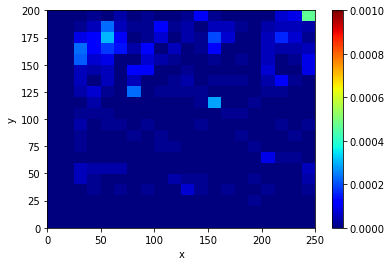

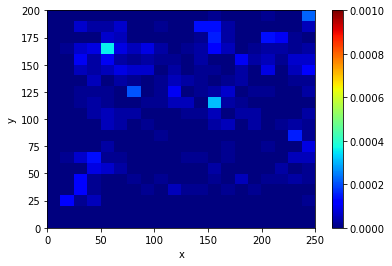

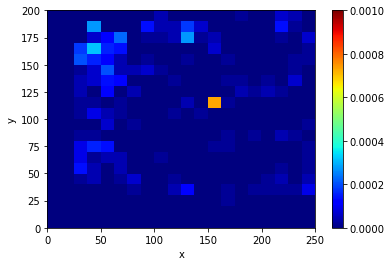

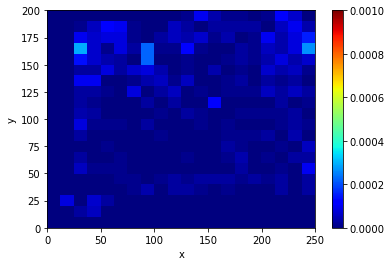

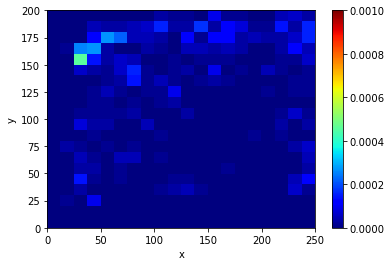

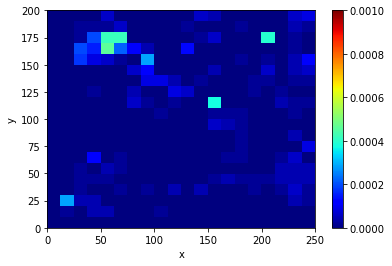

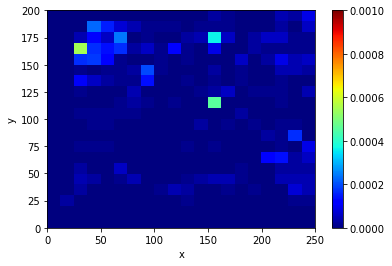

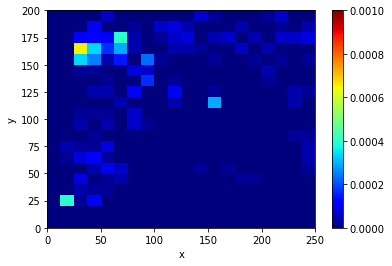

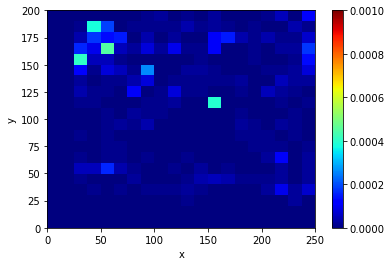

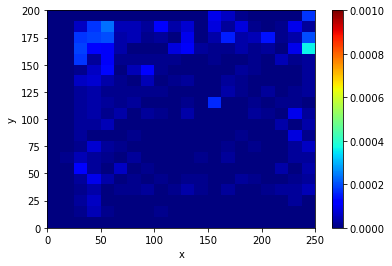

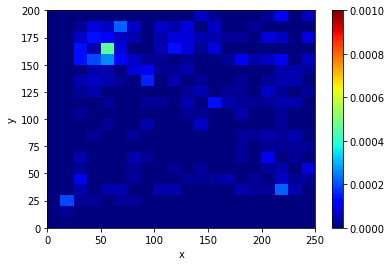

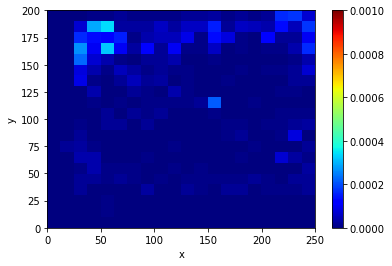

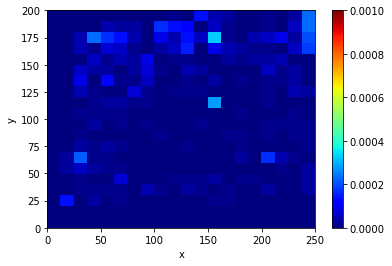

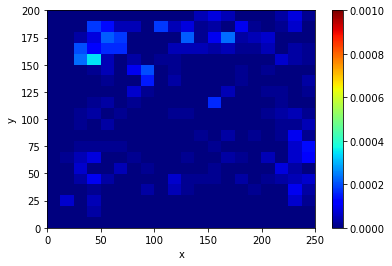

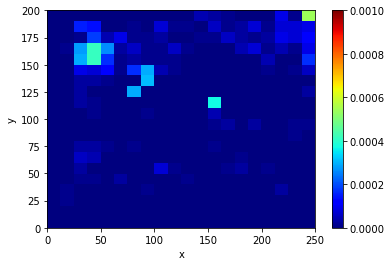

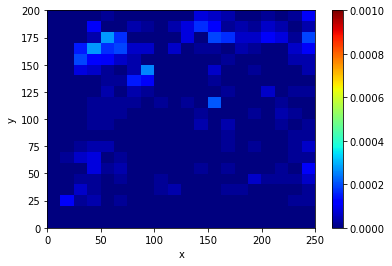

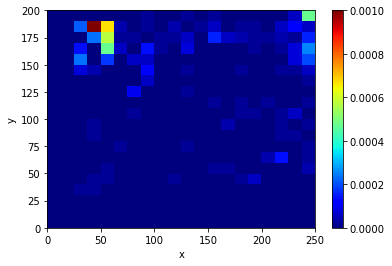

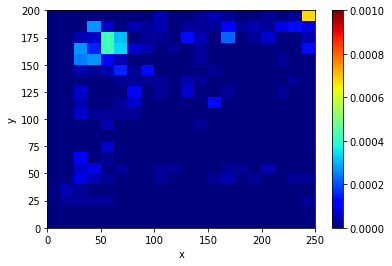

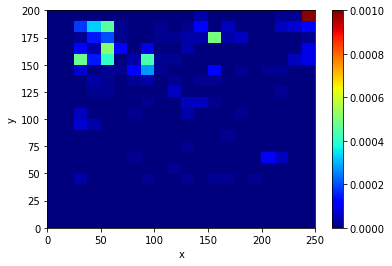

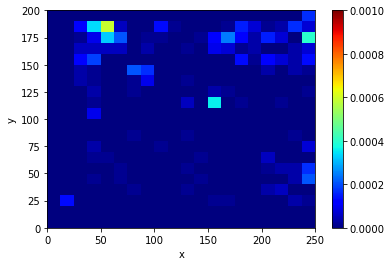

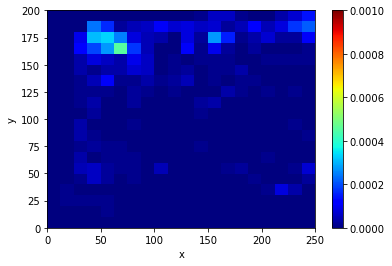

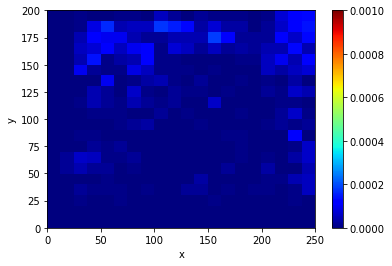

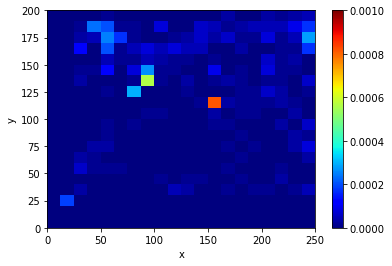

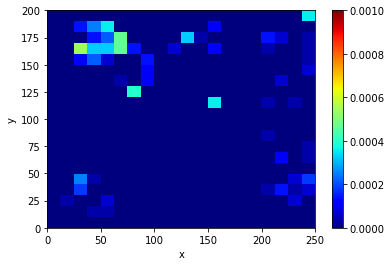

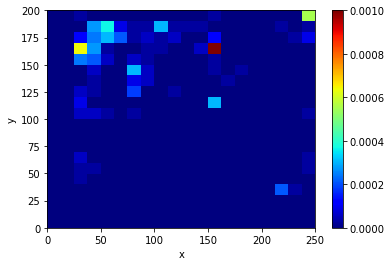

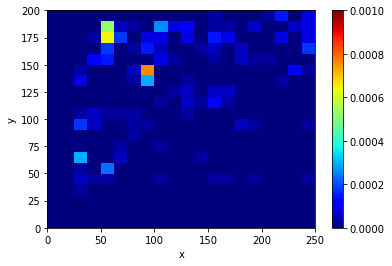

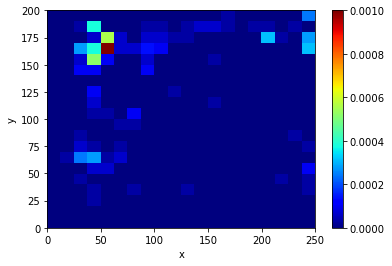

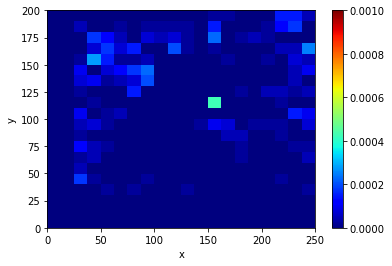

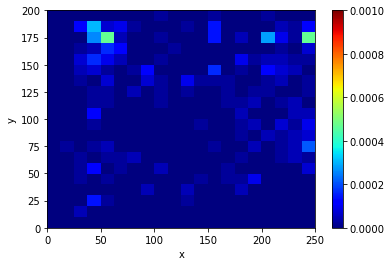

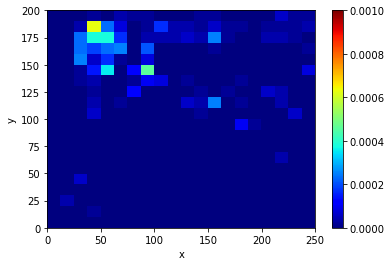

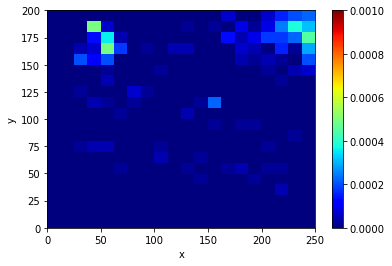

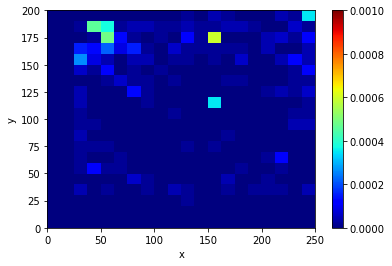

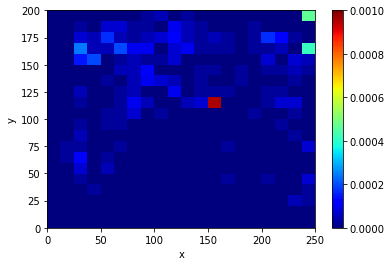

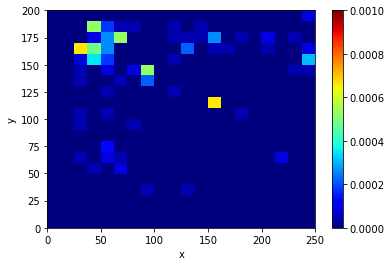

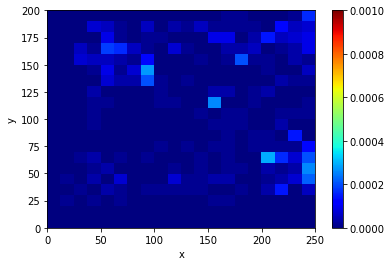

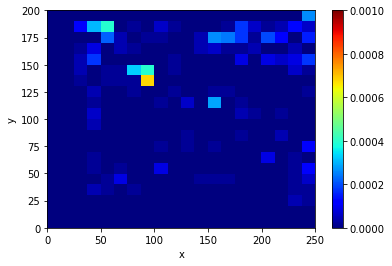

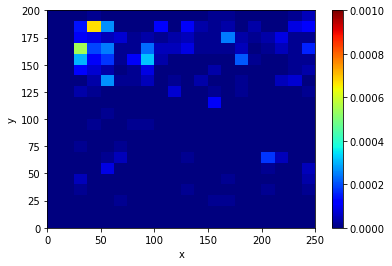

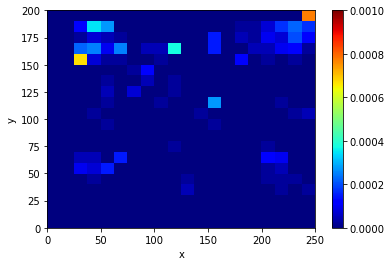

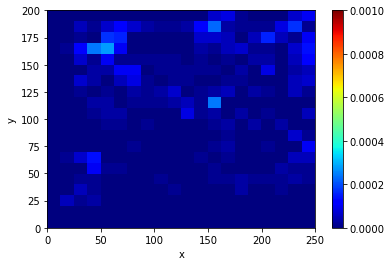

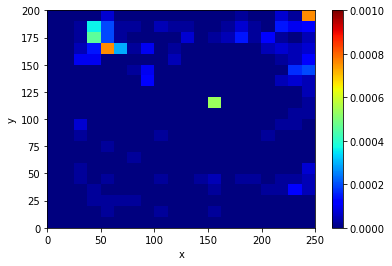

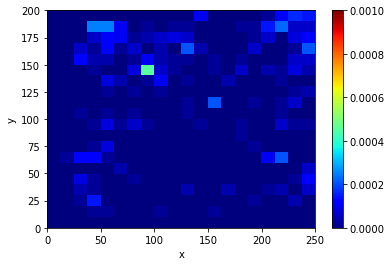

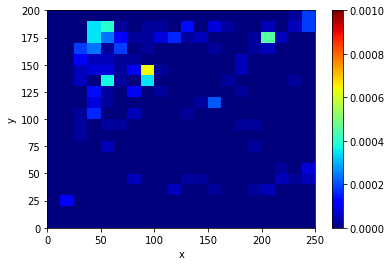

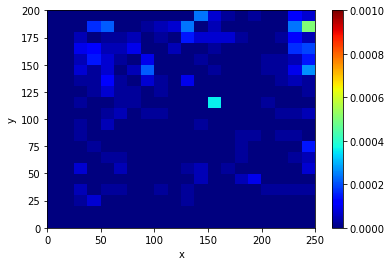

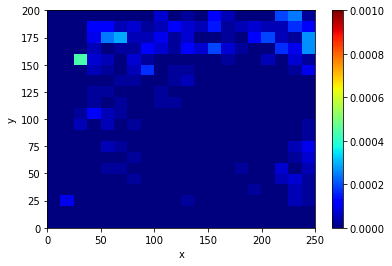

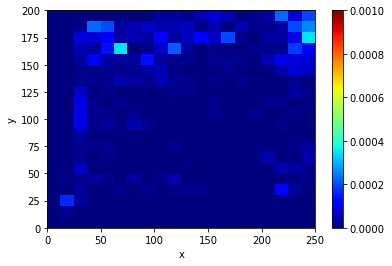

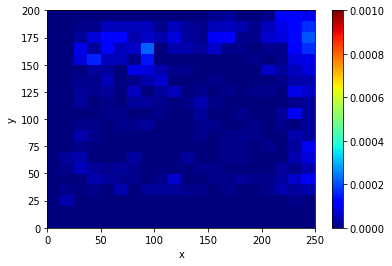

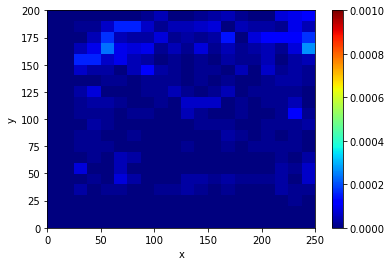

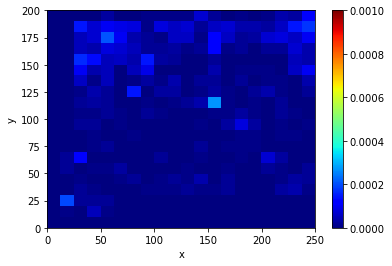

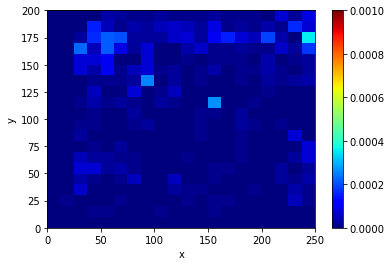

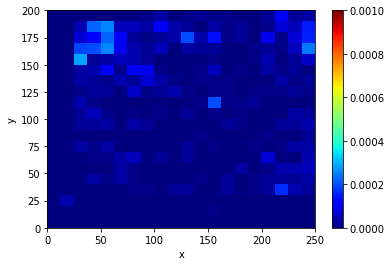

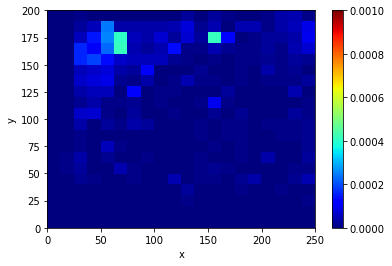

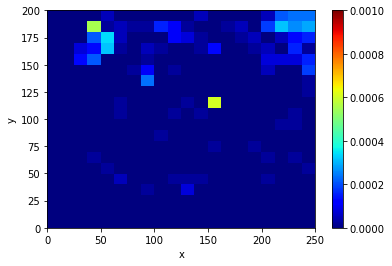

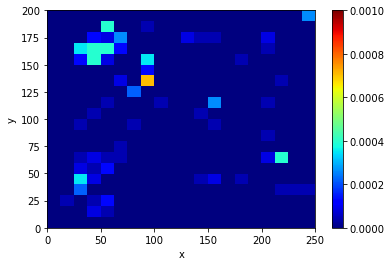

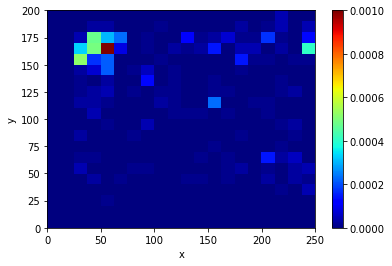

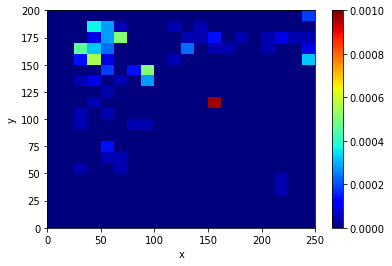

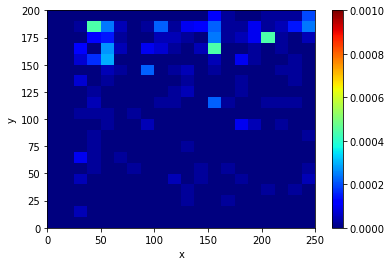

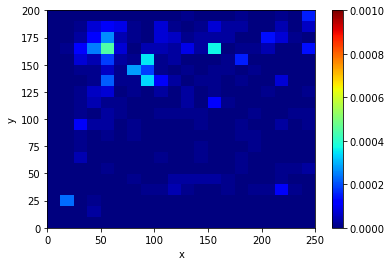

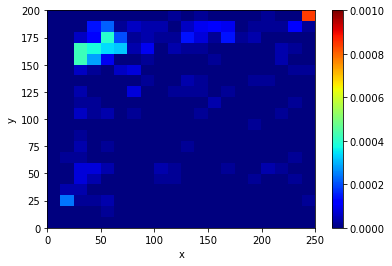

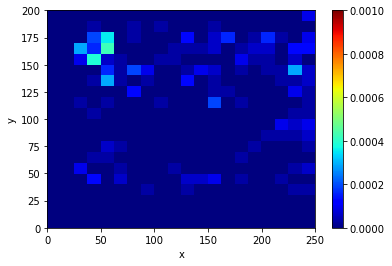

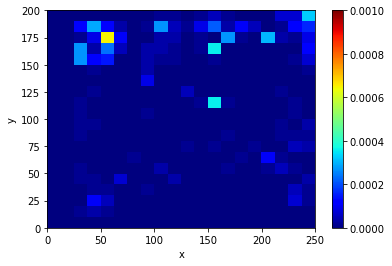

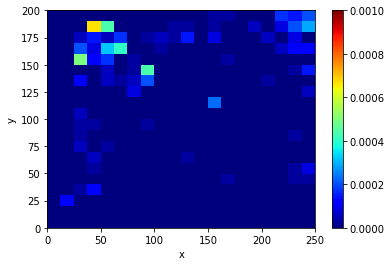

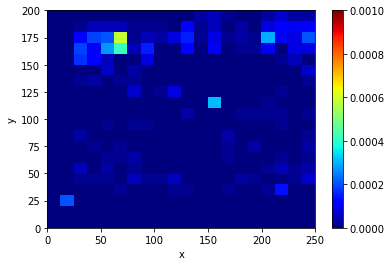

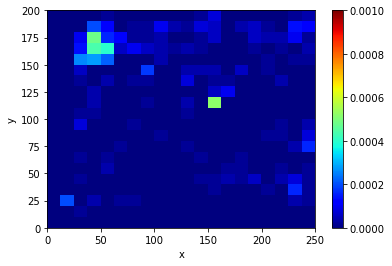

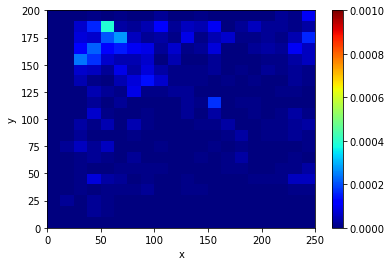

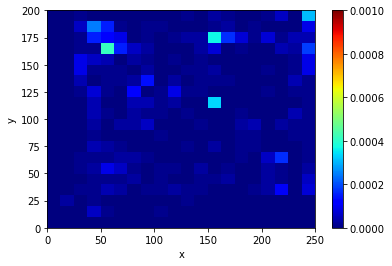

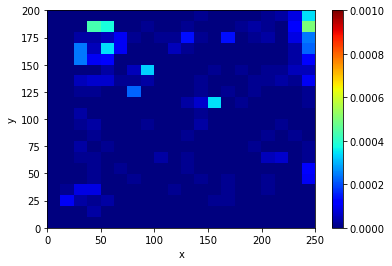

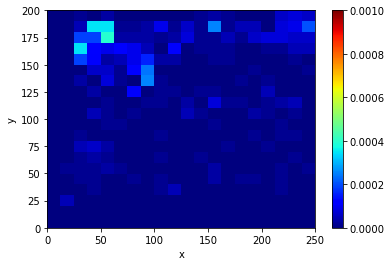

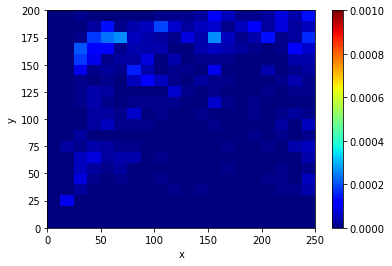

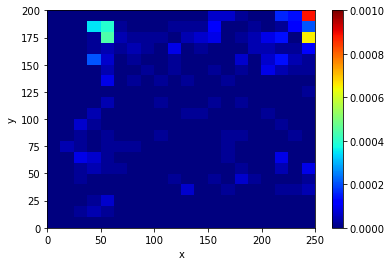

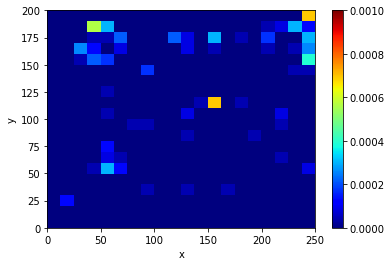

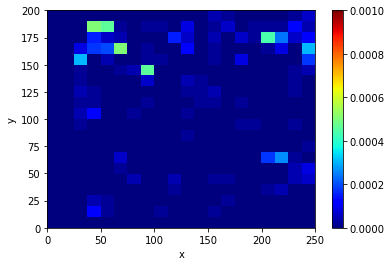

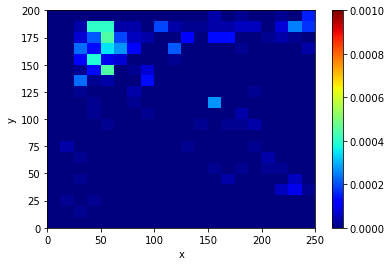

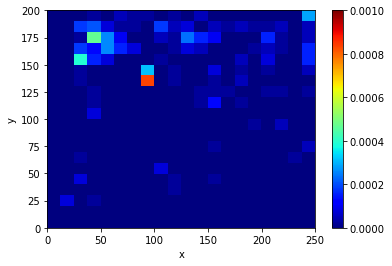

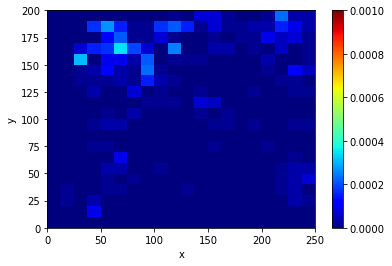

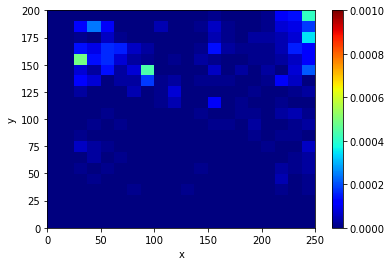

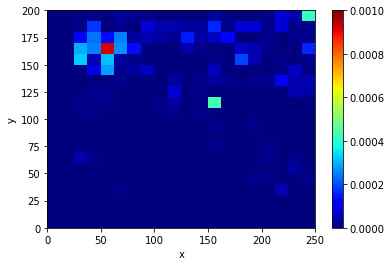

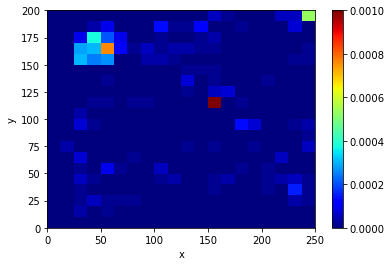

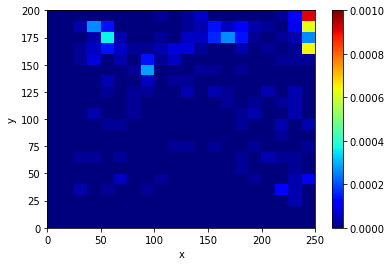

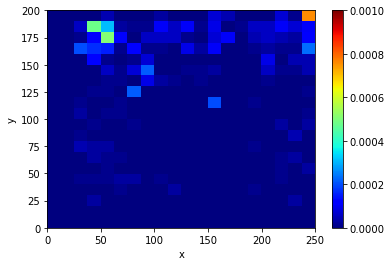

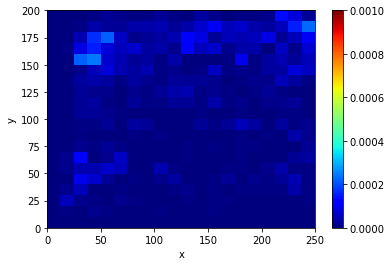

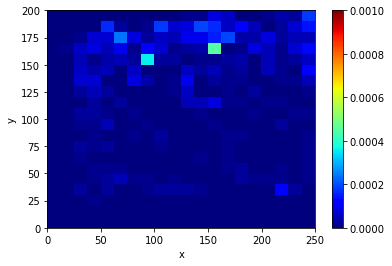

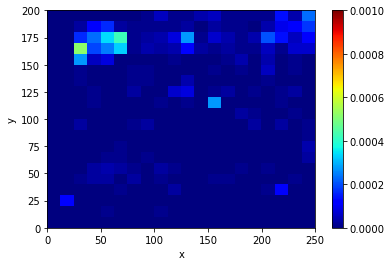

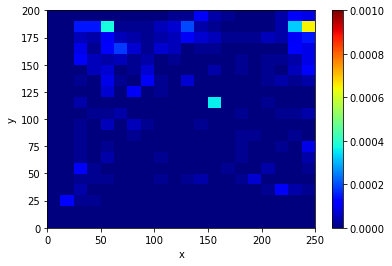

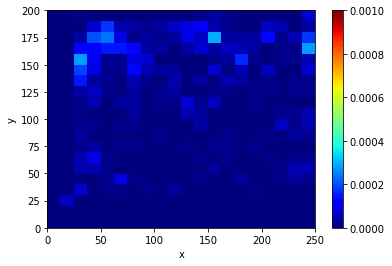

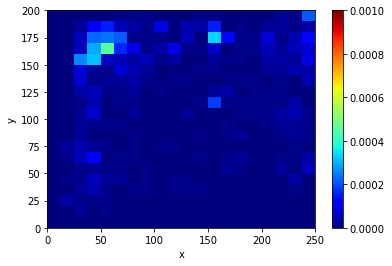

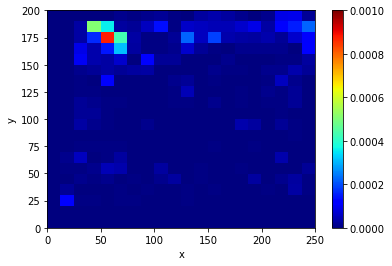

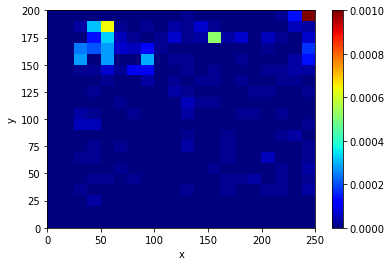

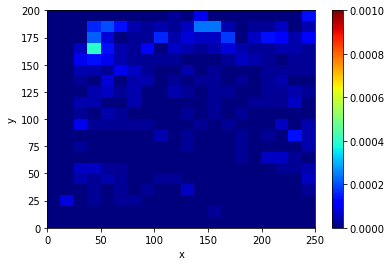

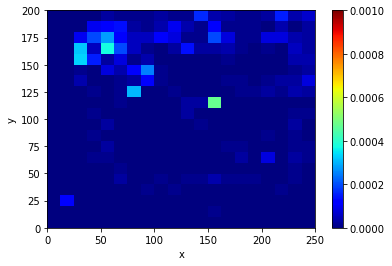

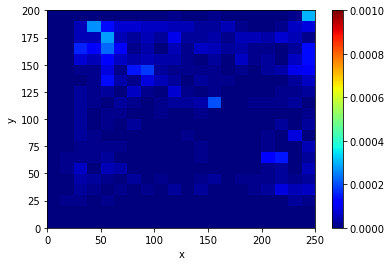

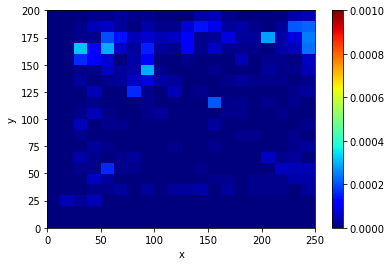

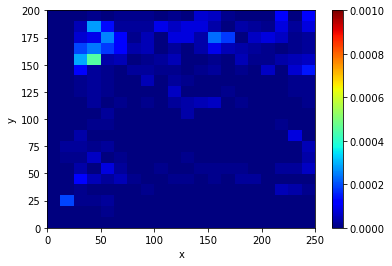

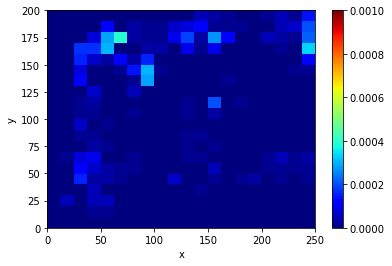

In [4]:
for j in range(dfmax_all.columns.get_loc(' C000'),dfmax_all.columns.get_loc(' C261')+1):
    
    dfmax_heat=pd.DataFrame()
    
    for ph in range(0,len(phase_list)):
        
        dfmax_ph=dfmax_all[dfmax_all['phase']==ph]
        
        max_value=dfmax_ph[dfmax_ph.columns[j]].max()

        dfmax_heat_ph=dfmax_ph[dfmax_ph[dfmax_ph.columns[j]]>0.250*max_value]
        
        dfmax_heat=pd.concat([dfmax_heat,dfmax_heat_ph])

    fig = plt.figure()
    ax = fig.add_subplot(111)

    H = ax.hist2d(dfmax_heat['X'],dfmax_heat['Y'], bins=20,range=[[0,250],[0,200]],normed=True,cmap=cm.jet)
    #ax.set_title('1st graph')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0,250)
    ax.set_ylim(0,200)
    H[3].set_clim(0,0.001)
    fig.colorbar(H[3],ax=ax)
    
    plt.show()


    #plt.xlabel('x')
    #plt.ylabel('y')             
    #title_name='fig1/sliceini_phase%s_mouse%s_%s' % (phase,mouse,dfmean.columns[j])
    #plt.title(title_name)
    #file_name=title_name+'.png'
    #plt.savefig(file_name)
    #plt.figure(figsize=(5.4, 3.6), dpi=80)
   #plt.show()

In [36]:
panel['dfmax_A1']

""


In [38]:
panel.shape

(9, 0, 0)